### Ejemplos

In [ ]:
#Ejercicio 1 -  Implementación de Bag of Words (BoW) y TF-IDF

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Datos de ejemplo
textos = [
    "El aprendizaje automático es increíble",
    "El procesamiento de lenguaje natural es fascinante",
    "El NLP permite a las máquinas entender el lenguaje humano"
]

# Bag of Words (BoW)
vectorizer_bow = CountVectorizer()
X_bow = vectorizer_bow.fit_transform(textos)
print("Bag of Words:\n", pd.DataFrame(X_bow.toarray(), columns=vectorizer_bow.get_feature_names_out()))

# TF-IDF
vectorizer_tfidf = TfidfVectorizer()
X_tfidf = vectorizer_tfidf.fit_transform(textos)
print("\nTF-IDF:\n", pd.DataFrame(X_tfidf.toarray(), columns=vectorizer_tfidf.get_feature_names_out()))

Bag of Words:
    aprendizaje  automático  de  el  entender  es  fascinante  humano  \
0            1           1   0   1         0   1           0       0   
1            0           0   1   1         0   1           1       0   
2            0           0   0   2         1   0           0       1   

   increíble  las  lenguaje  máquinas  natural  nlp  permite  procesamiento  
0          1    0         0         0        0    0        0              0  
1          0    0         1         0        1    0        0              1  
2          0    1         1         1        0    1        1              0  

TF-IDF:
    aprendizaje  automático        de        el  entender        es  \
0     0.504611    0.504611  0.000000  0.298032  0.000000  0.383770   
1     0.000000    0.000000  0.426184  0.251711  0.000000  0.324124   
2     0.000000    0.000000  0.000000  0.418317  0.354136  0.000000   

   fascinante    humano  increíble       las  lenguaje  máquinas   natural  \
0    0.000000  

In [ ]:
# Ejercicio 2 - Preprocesamiento de Texto con spaCy y NLTK

In [ ]:
!python -m spacy download es_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 57.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import spacy
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Descargar recursos de NLTK
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')
nlp = spacy.load("es_core_news_sm")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [ ]:


# Texto de ejemplo
texto = "El procesamiento de lenguaje natural es una rama fascinante de la inteligencia artificial."

# Preprocesamiento con NLTK
tokens = word_tokenize(texto.lower())  # Tokenización y conversión a minúsculas
stop_words = set(stopwords.words('spanish'))  # Lista de stopwords en español
tokens_filtrados = [word for word in tokens if word.isalnum() and word not in stop_words]

print("Tokenización con NLTK:", tokens)
print("Texto sin stopwords con NLTK:", tokens_filtrados)

# Preprocesamiento con spaCy
nlp = spacy.load("es_core_news_sm")  # Modelo de spaCy para español
doc = nlp(texto)

lemmas = [token.lemma_ for token in doc if not token.is_stop and token.is_alpha]

print("\nLematización con spaCy:", lemmas)

Tokenización con NLTK: ['el', 'procesamiento', 'de', 'lenguaje', 'natural', 'es', 'una', 'rama', 'fascinante', 'de', 'la', 'inteligencia', 'artificial', '.']
Texto sin stopwords con NLTK: ['procesamiento', 'lenguaje', 'natural', 'rama', 'fascinante', 'inteligencia', 'artificial']


/usr/local/lib/python3.11/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)



Lematización con spaCy: ['procesamiento', 'lenguaje', 'natural', 'rama', 'fascinante', 'inteligencia', 'artificial']


In [ ]:
#Ejercicio 3 - Implementación de Word2Vec con Gensim

In [ ]:
import gensim
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize

# Corpus de ejemplo
corpus = [
    "El procesamiento de lenguaje natural es útil",
    "Las redes neuronales mejoran el aprendizaje automático",
    "El NLP permite que las máquinas entiendan el texto",
    "Los embeddings de palabras representan el significado en espacios vectoriales"
]

# Tokenización
tokenized_corpus = [word_tokenize(sentence.lower()) for sentence in corpus]

# Entrenar el modelo Word2Vec
model = Word2Vec(sentences=tokenized_corpus, vector_size=50, window=5, min_count=1, workers=4)

# Ver similitud entre palabras
print("Similitud entre 'procesamiento' y 'aprendizaje':", model.wv.similarity("procesamiento", "aprendizaje"))
print("Palabras más similares a 'lenguaje':", model.wv.most_similar("lenguaje"))

Similitud entre 'procesamiento' y 'aprendizaje': -0.023310551
Palabras más similares a 'lenguaje': [('vectoriales', 0.3065578043460846), ('máquinas', 0.2704138457775116), ('redes', 0.22442302107810974), ('en', 0.21431542932987213), ('representan', 0.20489609241485596), ('mejoran', 0.19776302576065063), ('natural', 0.18339458107948303), ('procesamiento', 0.10232102125883102), ('aprendizaje', 0.10159843415021896), ('espacios', 0.0819411501288414)]


In [ ]:
# Ejercicio 4 - Uso de Hugging Face para Análisis de Sentimientos

In [ ]:
from transformers import pipeline

# Cargar el modelo preentrenado
sentiment_pipeline = pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment")

# Frases de prueba
textos = [
    "Este curso de NLP es increíblemente útil.",
    "No me gustó la forma en que explicaron este tema.",
    "La inteligencia artificial está cambiando el mundo."
]

# Predicción del sentimiento
for texto in textos:
    resultado = sentiment_pipeline(texto)
    print(f"Texto: {texto} -> Sentimiento: {resultado[0]['label']} (Score: {resultado[0]['score']:.4f})")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/669M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/872k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Device set to use cpu


Texto: Este curso de NLP es increíblemente útil. -> Sentimiento: 5 stars (Score: 0.6566)
Texto: No me gustó la forma en que explicaron este tema. -> Sentimiento: 2 stars (Score: 0.5277)
Texto: La inteligencia artificial está cambiando el mundo. -> Sentimiento: 5 stars (Score: 0.5010)


In [ ]:
#Ejercicio 1 Adicional: Comparación de Documentos mediante Similaridad Coseno
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Ejemplo de corpus con más documentos
corpus = [
    "El aprendizaje automático es increíble.",
    "El procesamiento de lenguaje natural permite a las máquinas entender el lenguaje humano.",
    "Las técnicas de NLP son fundamentales para el análisis de datos.",
    "El aprendizaje profundo ha revolucionado la inteligencia artificial.",
    "La inteligencia artificial y el procesamiento de datos abren nuevas oportunidades."
]

# Representación TF-IDF
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(corpus)

# Calcular la similitud coseno entre todos los documentos
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Mostrar la matriz de similitud
df_sim = pd.DataFrame(cosine_sim, columns=[f'Doc{i+1}' for i in range(len(corpus))],
                      index=[f'Doc{i+1}' for i in range(len(corpus))])
print("Matriz de similitud (TF-IDF):\n", df_sim)

Matriz de similitud (TF-IDF):
           Doc1      Doc2      Doc3      Doc4      Doc5
Doc1  1.000000  0.067537  0.037762  0.184637  0.043799
Doc2  0.067537  1.000000  0.192034  0.055078  0.172834
Doc3  0.037762  0.192034  1.000000  0.030796  0.220826
Doc4  0.184637  0.055078  0.030796  1.000000  0.342914
Doc5  0.043799  0.172834  0.220826  0.342914  1.000000


In [ ]:
#Ejercicio 2 Adicional: Extracción de Entidades Nombradas y Análisis de Dependencias
import spacy

# Asegúrate de tener instalado el modelo en Colab:
# !python -m spacy download es_core_news_sm

nlp = spacy.load("es_core_news_sm")
texto = "Apple anunció el nuevo iPhone en San Francisco durante una conferencia en 2023."

doc = nlp(texto)

# Extracción de entidades nombradas
print("Entidades Nombradas:")
for ent in doc.ents:
    print(f"{ent.text} --> {ent.label_}")

# Análisis de dependencias
print("\nRelaciones de dependencia:")
for token in doc:
    print(f"{token.text:10} {token.dep_:10} {token.head.text:10}")

/usr/local/lib/python3.11/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)


Entidades Nombradas:
Apple --> ORG
iPhone --> MISC
San Francisco --> LOC

Relaciones de dependencia:
Apple      nsubj      anunció   
anunció    ROOT       anunció   
el         det        iPhone    
nuevo      amod       iPhone    
iPhone     obj        anunció   
en         case       San       
San        nmod       iPhone    
Francisco  flat       San       
durante    case       conferencia
una        det        conferencia
conferencia obl        anunció   
en         case       2023      
2023       nmod       conferencia
.          punct      anunció   


Analogías encontradas: [('la', 0.2722955346107483), ('que', 0.26491960883140564), ('embeddings', 0.22356238961219788)]


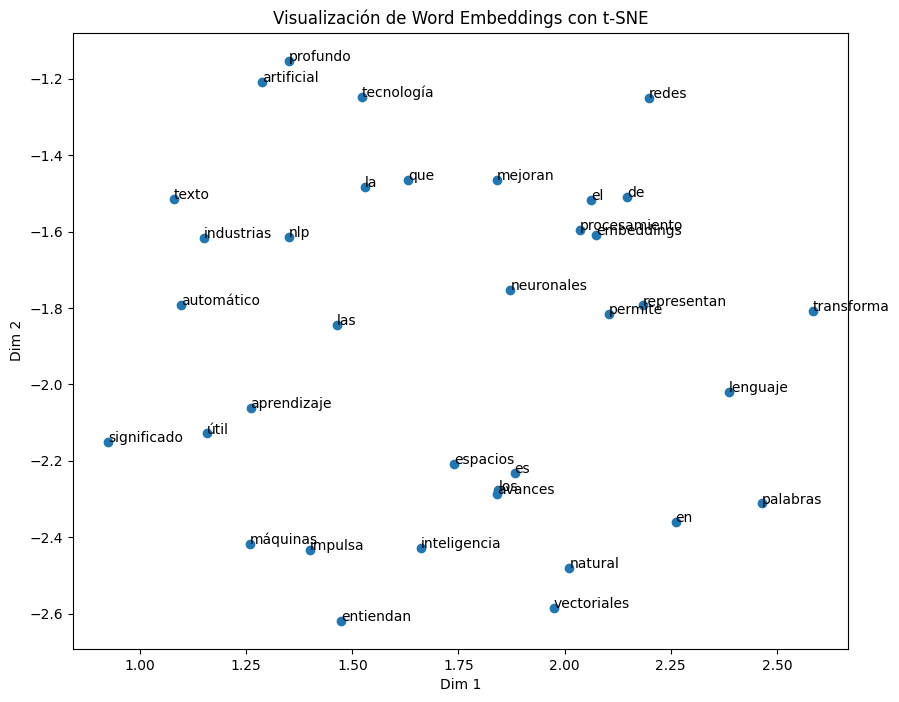

In [ ]:
import gensim
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import numpy as np

# Corpus extendido de ejemplo
corpus = [
    "El procesamiento de lenguaje natural es útil",
    "Las redes neuronales mejoran el aprendizaje automático",
    "El NLP permite que las máquinas entiendan el texto",
    "Los embeddings de palabras representan el significado en espacios vectoriales",
    "La inteligencia artificial transforma industrias",
    "El aprendizaje profundo impulsa avances en la tecnología"
]

# Tokenización
tokenized_corpus = [word_tokenize(sentence.lower()) for sentence in corpus]

# Entrenar el modelo Word2Vec
model = Word2Vec(sentences=tokenized_corpus, vector_size=50, window=5, min_count=1, workers=4)

# Búsqueda de analogías: "inteligencia" : "artificial" :: "aprendizaje" : ?
try:
    analogia = model.wv.most_similar(positive=["artificial", "aprendizaje"], negative=["inteligencia"], topn=3)
    print("Analogías encontradas:", analogia)
except KeyError as e:
    print("Error:", e)

# Visualización de embeddings usando t-SNE para un subconjunto de palabras
words = list(model.wv.index_to_key)
word_vectors = [model.wv[w] for w in words]

# Convertir la lista a un array de NumPy
word_vectors_array = np.array(word_vectors)

tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(word_vectors_array)

plt.figure(figsize=(10, 8))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1])
for i, word in enumerate(words):
    plt.annotate(word, (tsne_results[i, 0], tsne_results[i, 1]))
plt.title("Visualización de Word Embeddings con t-SNE")
plt.xlabel("Dim 1")
plt.ylabel("Dim 2")
plt.show()

In [ ]:
#Ejercicio 4 Adicional - Comparación de Modelos de Sentimiento con Hugging Face

from transformers import pipeline

# Cargar dos pipelines de análisis de sentimiento con modelos distintos
modelo_1 = pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment")
modelo_2 = pipeline("sentiment-analysis", model="cardiffnlp/twitter-xlm-roberta-base-sentiment")

# Textos de prueba
textos = [
    "Este curso de NLP es increíble y muy útil.",
    "No me gustó la forma en que se presentó el tema.",
    "La tecnología está cambiando el mundo de manera asombrosa."
]

# Evaluar con ambos modelos y comparar resultados
print("Resultados con modelo 1 (nlptown/bert-base-multilingual-uncased-sentiment):")
for texto in textos:
    resultado = modelo_1(texto)
    print(f"Texto: {texto} -> {resultado}")

print("\nResultados con modelo 2 (cardiffnlp/twitter-xlm-roberta-base-sentiment):")
for texto in textos:
    resultado = modelo_2(texto)
    print(f"Texto: {texto} -> {resultado}")

Device set to use cpu


config.json:   0%|          | 0.00/841 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.11G [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.11G [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

Device set to use cpu


Resultados con modelo 1 (nlptown/bert-base-multilingual-uncased-sentiment):
Texto: Este curso de NLP es increíble y muy útil. -> [{'label': '5 stars', 'score': 0.7737338542938232}]
Texto: No me gustó la forma en que se presentó el tema. -> [{'label': '2 stars', 'score': 0.4636383652687073}]
Texto: La tecnología está cambiando el mundo de manera asombrosa. -> [{'label': '5 stars', 'score': 0.6142486333847046}]

Resultados con modelo 2 (cardiffnlp/twitter-xlm-roberta-base-sentiment):
Texto: Este curso de NLP es increíble y muy útil. -> [{'label': 'positive', 'score': 0.9262264370918274}]
Texto: No me gustó la forma en que se presentó el tema. -> [{'label': 'negative', 'score': 0.9001837372779846}]
Texto: La tecnología está cambiando el mundo de manera asombrosa. -> [{'label': 'positive', 'score': 0.43638285994529724}]


### Tratamiento de texto

In [37]:
import os
import pandas as pd
import kagglehub
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import nltk

import spacy
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

import gensim
from gensim.models import Word2Vec

from transformers import pipeline

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import linear_kernel

import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import numpy as np

import re

In [41]:
regex_no_alpha = re.compile(r'[^a-zA-ZáéíóúÁÉÍÓÚñÑ\s]')  # Mantener espacios
regex_digits = re.compile(r'\d+')
regex_spaces = re.compile(r'\s+')
regex_repeats = re.compile(r'(.)\1{2,}')  # Reduce caracteres repetidos a dos

def limpiar_texto(texto):
    if isinstance(texto, str):
        texto = regex_no_alpha.sub(' ', texto)  # Eliminar caracteres no alfabéticos excepto espacios
        texto = regex_digits.sub('', texto)  # Eliminar números
        texto = regex_spaces.sub(' ', texto).strip()  # Espacios extra
        texto = regex_repeats.sub(r'\1\1', texto)  # Reducir repeticiones
        return texto
    return ""

#### Datasets parte 1

###### Dataset 1

In [ ]:
import kagglehub

# Download latest version
path_parte_1 = kagglehub.dataset_download("bwandowando/1-5-million-netflix-google-store-reviews")

print("Path to dataset files:", path_parte_1)

In [ ]:
# Cambio de path para ejecutar desde servidores USFQ
path_parte_1 = "/content/NETFLIX_REVIEWS.csv"
df_parte_1 = pd.read_csv(path_parte_1)

# Aplicar limpieza a la columna review_text
df_parte_1["review_text_limpio"] = df_parte_1["review_text"].apply(limpiar_texto)

# Mostrar algunas filas con texto original y limpio
print(df_parte_1[["review_text", "review_text_limpio"]].head())

                                         review_text  \
0  Works great on my Evo! Glad android phones are...   
1  Works great on HTC incredible. Can't wait to t...   
2                             Works great on nexus s   
3  Working perfect for me on EVO, running CM 7.0.3.1   
4                                       cm7 2.3.3 N1   

                                  review_text_limpio  
0  Works great on my Evo Glad android phones are ...  
1  Works great on HTC incredible Can t wait to tr...  
2                             Works great on nexus s  
3           Working perfect for me on EVO running CM  
4                                               cm N  


###### Dataset 2

In [ ]:
import kagglehub

# Download latest version
path_parte_2 = kagglehub.dataset_download("waalbannyantudre/hate-speech-detection-curated-dataset")

print("Path to dataset files:", path_parte_2)

In [ ]:
# Cambio de path para ejecutar desde servidores USFQ
path_parte_2 = "/content/HateSpeechDatasetBalanced.csv"

In [ ]:
# No necesita limpieza
df_parte_2 = pd.read_csv(path_parte_2)
print(df_parte_2["Content"].head())

0    denial of normal the con be asked to comment o...
1    just by being able to tweet this insufferable ...
2    that is retarded you too cute to be single tha...
3    thought of a real badass mongol style declarat...
4                                  afro american basho
Name: Content, dtype: object


#### Datasets parte 2

###### Dataset 1

In [ ]:
import kagglehub

# Download latest version
path2_parte_1 = kagglehub.dataset_download("ahmedwaelnasef/restaurant-reviews")

print("Path to dataset files:", path2_parte_1)

In [ ]:
path2_parte_1 = "/content/converted_yelp_restaurant_reviews.csv"

df2_parte_1 = pd.read_csv(path2_parte_1)

# Aplicar limpieza a la columna review_text
df2_parte_1["review_text_limpio"] = df2_parte_1["text"].apply(limpiar_texto)

# Mostrar algunas filas con texto original y limpio
print(df2_parte_1[["text", "review_text_limpio"]].head())

                                                text  \
0  Who knew Applebee's was open until midnight? A...   
1  Original shrimp pasta is totally awesome.  Lun...   
2  Very spacious with great seating atmosphere.  ...   
3  Too thick burgers at a Latin restaurant = half...   
4  Best beignets in town. Not that I want to star...   

                                  review_text_limpio  
0  Who knew Applebee s was open until midnight Al...  
1  Original shrimp pasta is totally awesome Lunch...  
2  Very spacious with great seating atmosphere Th...  
3  Too thick burgers at a Latin restaurant half u...  
4  Best beignets in town Not that I want to start...  


###### Dataset 2

In [ ]:
import kagglehub

# Download latest version
path2_parte_2 = kagglehub.dataset_download("kevserbrayildirim/sentiment140")

print("Path to dataset files:", path2_parte_2)

In [42]:
path2_parte_2 = "/content/new_train_data_s140.csv"

df2_parte_2 = pd.read_csv(path2_parte_2)

# Aplicar limpieza a la columna review_text
df2_parte_2["text_limpio"] = df2_parte_2["Text"].map(limpiar_texto)

# Mostrar algunas filas con texto original y limpio
print(df2_parte_2[["Text", "text_limpio"]].head())

                                                Text  \
0  @Kenichan I dived many times for the ball. Man...   
1    my whole body feels itchy and like its on fire    
2  @nationwideclass no, it's not behaving at all....   
3                      @Kwesidei not the whole crew    
4                                        Need a hug    

                                         text_limpio  
0  Kenichan I dived many times for the ball Manag...  
1     my whole body feels itchy and like its on fire  
2  nationwideclass no it s not behaving at all i ...  
3                        Kwesidei not the whole crew  
4                                         Need a hug  


### Solución parte 1

In [ ]:
# !pip install kagglehub nltk

#### Ejercicio 1

In [ ]:
# Descargar modelo de tokenización si no lo tienes
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
# Extraer solo la columna de reseñas y convertir a lista
textos = df_parte_1["review_text_limpio"].astype(str).tolist()

# Inicializar y aplicar CountVectorizer
vectorizer_bow = CountVectorizer()
X_bow = vectorizer_bow.fit_transform(textos)

# Convertir a DataFrame para visualizar mejor
df_bow = pd.DataFrame(X_bow[:5].todense(), columns=vectorizer_bow.get_feature_names_out())

# Mostrar las primeras filas del BoW
print("Bag of Words (primeras filas):\n", df_bow.head())

Bag of Words (primeras filas):
    aa  aaa  aaaa  aaaaaaaaaa  aaaaaaaaaaaaaaa  aaaaaaaaavvbbhffvvbvbbvvbbvvbb  \
0   0    0     0           0                0                               0   
1   0    0     0           0                0                               0   
2   0    0     0           0                0                               0   
3   0    0     0           0                0                               0   
4   0    0     0           0                0                               0   

   aaaaaqaa  aaaaauggggghhhhhh  aaaaazing  aaaaw  ...  últimas  último  \
0         0                  0          0      0  ...        0       0   
1         0                  0          0      0  ...        0       0   
2         0                  0          0      0  ...        0       0   
3         0                  0          0      0  ...        0       0   
4         0                  0          0      0  ...        0       0   

   últimos  úng  única  únicamente  

In [ ]:
# Inicializar y aplicar TfidfVectorizer
vectorizer_tfidf = TfidfVectorizer()
X_tfidf = vectorizer_tfidf.fit_transform(textos)

# Convertir a DataFrame
df_tfidf = pd.DataFrame(X_tfidf[:5].todense(), columns=vectorizer_tfidf.get_feature_names_out())

# Mostrar las primeras filas del TF-IDF
print("\nTF-IDF (primeras filas) :\n", df_tfidf.head())


TF-IDF (primeras filas) :
     aa  aaa  aaaa  aaaaaaaaaa  aaaaaaaaaaaaaaa  \
0  0.0  0.0   0.0         0.0              0.0   
1  0.0  0.0   0.0         0.0              0.0   
2  0.0  0.0   0.0         0.0              0.0   
3  0.0  0.0   0.0         0.0              0.0   
4  0.0  0.0   0.0         0.0              0.0   

   aaaaaaaaavvbbhffvvbvbbvvbbvvbb  aaaaaqaa  aaaaauggggghhhhhh  aaaaazing  \
0                             0.0       0.0                0.0        0.0   
1                             0.0       0.0                0.0        0.0   
2                             0.0       0.0                0.0        0.0   
3                             0.0       0.0                0.0        0.0   
4                             0.0       0.0                0.0        0.0   

   aaaaw  ...  últimas  último  últimos  úng  única  únicamente  único  úse  \
0    0.0  ...      0.0     0.0      0.0  0.0    0.0         0.0    0.0  0.0   
1    0.0  ...      0.0     0.0      0.0  0.0    0.

#### Ejercicio 2

In [ ]:
!python -m spacy download es_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 56.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
# Descargar recursos de NLTK (solo una vez)
nltk.download("punkt")
nltk.download("stopwords")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# Extraer solo la columna de input
texto = df_parte_2["Content"].astype(str).tolist()

# Preprocesamiento con NLTK
for i, texto in enumerate(texto[:5]):  # Solo las primeras 5 reseñas para ejemplo
  tokens = word_tokenize(texto)  # Tokenización y conversión a minúsculas
  stop_words = set(stopwords.words('spanish'))  # Lista de stopwords en español
  tokens_filtrados = [word for word in tokens if word.isalnum() and word not in stop_words]

  print("Tokenización con NLTK:", tokens)
  print("Texto sin stopwords con NLTK:", tokens_filtrados)

  # Preprocesamiento con spaCy
  nlp = spacy.load("es_core_news_sm")  # Modelo de spaCy para español
  doc = nlp(texto)

  lemmas = [token.lemma_ for token in doc if not token.is_stop and token.is_alpha]

  print("\nLematización con spaCy:", lemmas)

Tokenización con NLTK: ['denial', 'of', 'normal', 'the', 'con', 'be', 'asked', 'to', 'comment', 'on', 'tragedies', 'an', 'emotional', 'retard']
Texto sin stopwords con NLTK: ['denial', 'of', 'normal', 'the', 'be', 'asked', 'to', 'comment', 'on', 'tragedies', 'an', 'emotional', 'retard']

Lematización con spaCy: ['denial', 'of', 'normal', 'the', 'be', 'asked', 'to', 'comment', 'on', 'tragedies', 'an', 'emotional', 'retard']
Tokenización con NLTK: ['just', 'by', 'being', 'able', 'to', 'tweet', 'this', 'insufferable', 'bullshit', 'proves', 'trump', 'a', 'nazi', 'you', 'vagina']
Texto sin stopwords con NLTK: ['just', 'by', 'being', 'able', 'to', 'tweet', 'this', 'insufferable', 'bullshit', 'proves', 'trump', 'nazi', 'you', 'vagina']

Lematización con spaCy: ['just', 'by', 'being', 'able', 'to', 'tweet', 'this', 'insufferable', 'bullshit', 'prov', 'trump', 'nazi', 'you', 'vagina']
Tokenización con NLTK: ['that', 'is', 'retarded', 'you', 'too', 'cute', 'to', 'be', 'single', 'that', 'is', 'li

#### Ejercicio 3

In [ ]:
# Descargar recursos necesarios de NLTK
nltk.download("punkt")

# Extraer el input de hate speech como lista de texto
corpus = df_parte_2["Content"].astype(str).tolist()

# Tokenización de hate speech
tokenized_corpus = [word_tokenize(sentence.lower()) for sentence in corpus]

# Entrenar el modelo Word2Vec con el corpus tokenizado
model = Word2Vec(sentences=tokenized_corpus, vector_size=50, window=5, min_count=2, workers=4)

# Ver similitud entre palabras
try:
    print("Similitud entre 'nazi' y 'attackers':", model.wv.similarity("nazi", "attackers"))
    print("Palabras más similares a 'bullshit':", model.wv.most_similar("bullshit"))
except KeyError as e:
    print(f"Error: {e}. Puede que esas palabras no estén en el vocabulario.")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Similitud entre 'nazi' y 'attackers': 0.24587944
Palabras más similares a 'bullshit': [('crap', 0.7786300182342529), ('nonsense', 0.7352020740509033), ('idiocy', 0.7067883014678955), ('lies', 0.6881319880485535), ('garbage', 0.6844998598098755), ('rubbish', 0.6760668754577637), ('gossip', 0.6529765129089355), ('ridiculous', 0.6521845459938049), ('shit', 0.6437703371047974), ('propaganda', 0.6329944133758545)]


#### Ejercicio 4

In [ ]:
# Cargar el modelo preentrenado
sentiment_pipeline = pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment")

# Extraer el input de hate speech como lista de texto
textos = df_parte_2["Content"].astype(str).tolist()

# Predicción del sentimiento
for texto in textos[:20]:
    resultado = sentiment_pipeline(texto)
    print(f"Texto: {texto} -> Sentimiento: {resultado[0]['label']} (Score: {resultado[0]['score']:.4f})")

Texto: denial of normal the con be asked to comment on tragedies an emotional retard -> Sentimiento: 1 star (Score: 0.5702)
Texto: just by being able to tweet this insufferable bullshit proves trump a nazi you vagina -> Sentimiento: 1 star (Score: 0.8288)
Texto: that is retarded you too cute to be single that is life -> Sentimiento: 1 star (Score: 0.4096)
Texto: thought of a real badass mongol style declaration of war the attackers capture a citizen of the soon to be -> Sentimiento: 1 star (Score: 0.3319)
Texto: afro american basho -> Sentimiento: 1 star (Score: 0.2951)
Texto: yeah retard haha -> Sentimiento: 1 star (Score: 0.4686)
Texto: the ching chong chung stuff -> Sentimiento: 5 stars (Score: 0.3479)
Texto: the dead what a slut still warm when she tweeted this it what a slut that vagina her mate obama who sent the fucking lowlife -> Sentimiento: 1 star (Score: 0.7050)
Texto: let your tweets be harmless it will not affect me by the way i am not the faggot one she is n -> Sentimient

### Solución parte 2

#### Ejercicio 1

In [ ]:
# Extraer las reseñas en español como lista de texto
corpus = df2_parte_1["review_text_limpio"].astype(str).tolist()

# Representación TF-IDF
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(corpus)

# Definir tamaño de bloque
block_size = 2000

n_docs = len(corpus)

# Diccionario para almacenar los resultados por bloques
similarities = {}

print("Iniciando cálculo de similitud en bloques...")

for start in range(0, n_docs, block_size):
    end = min(start + block_size, n_docs)

    # Calcular la similitud solo para el bloque actual
    block_sim = cosine_similarity(tfidf_matrix[start:end], tfidf_matrix)

    # Guardar en un diccionario en lugar de una matriz gigante
    similarities[start] = block_sim

    print(f"Procesado bloque {start} a {end}...")

# Convertir los resultados en un DataFrame
# Unir los bloques en una matriz más pequeña (solo los documentos más similares)
df_sim = pd.DataFrame()

for start, block in similarities.items():
    df_temp = pd.DataFrame(
        block,
        columns=[f'Doc{i+1}' for i in range(n_docs)],
        index=[f'Doc{i+1}' for i in range(start, start + block.shape[0])]
    )
    df_sim = pd.concat([df_sim, df_temp])

# Mostrar parte de la matriz de similitud por si es muy grande
print("Matriz de similitud (TF-IDF) por bloques:\n", df_sim.head(10))

Iniciando cálculo de similitud en bloques...
Procesado bloque 0 a 2000...
Procesado bloque 2000 a 4000...
Procesado bloque 4000 a 6000...
Procesado bloque 6000 a 8000...
Procesado bloque 8000 a 10000...
Procesado bloque 10000 a 12000...
Procesado bloque 12000 a 14000...
Procesado bloque 14000 a 16000...
Procesado bloque 16000 a 18000...
Procesado bloque 18000 a 20000...
Procesado bloque 20000 a 22000...
Procesado bloque 22000 a 24000...
Procesado bloque 24000 a 26000...
Procesado bloque 26000 a 28000...
Procesado bloque 28000 a 30000...
Procesado bloque 30000 a 32000...
Procesado bloque 32000 a 34000...
Procesado bloque 34000 a 36000...
Procesado bloque 36000 a 38000...
Procesado bloque 38000 a 40000...
Procesado bloque 40000 a 42000...
Procesado bloque 42000 a 44000...
Procesado bloque 44000 a 46000...
Procesado bloque 46000 a 48000...
Procesado bloque 48000 a 50000...
Procesado bloque 50000 a 52000...
Procesado bloque 52000 a 54000...
Procesado bloque 54000 a 56000...
Procesado bloqu

#### Ejercicio 2

In [ ]:
# Cargar el modelo de spaCy para español
nlp = spacy.load("es_core_news_sm")

# Extraer las reseñas en español como lista de texto
corpus = df2_parte_1["review_text_limpio"].astype(str).tolist()

# Procesar cada reseña
for i, texto in enumerate(corpus[:5]):  # Solo las primeras 5 reseñas para ejemplo
    doc = nlp(texto)

    print(f"\n Análisis del Documento {i+1}:\n")

    # Extracción de entidades nombradas
    print(" Entidades Nombradas:")
    for ent in doc.ents:
        print(f"  {ent.text} --> {ent.label_}")

    # Análisis de dependencias
    print("\n Relaciones de Dependencia:")
    for token in doc:
        print(f"  {token.text:15} {token.dep_:15} {token.head.text}")

    print("-" * 50)  # Separador entre documentos


 Análisis del Documento 1:

 Entidades Nombradas:
  Who --> ORG
  Applebee --> MISC
  All the negatrons below me can suck it Hammy --> MISC
  up if you play your cards right --> MISC
  And tonight your cards are whatever --> MISC
  royal flush --> ORG
  full house times --> ORG
  if you knowhatImean Yeah Let s share the sampler plate and --> MISC
  Caribbean island that only we can dream about Nachos are zany And --> MISC

 Relaciones de Dependencia:
  Who             nsubj           open
  knew            flat            Who
  Applebee        flat            Who
  s               cc              was
  was             conj            Applebee
  open            ROOT            open
  until           obj             open
  midnight        obj             open
  All             flat            midnight
  the             flat            All
  negatrons       flat            All
  below           flat            midnight
  me              obj             can
  can             nsubj        

#### Ejercicio 3

Analogías encontradas: [('smile', 0.4935548007488251), ('sheryllovesdmb', 0.4815202057361603), ('thisismegeorgie', 0.47272464632987976)]


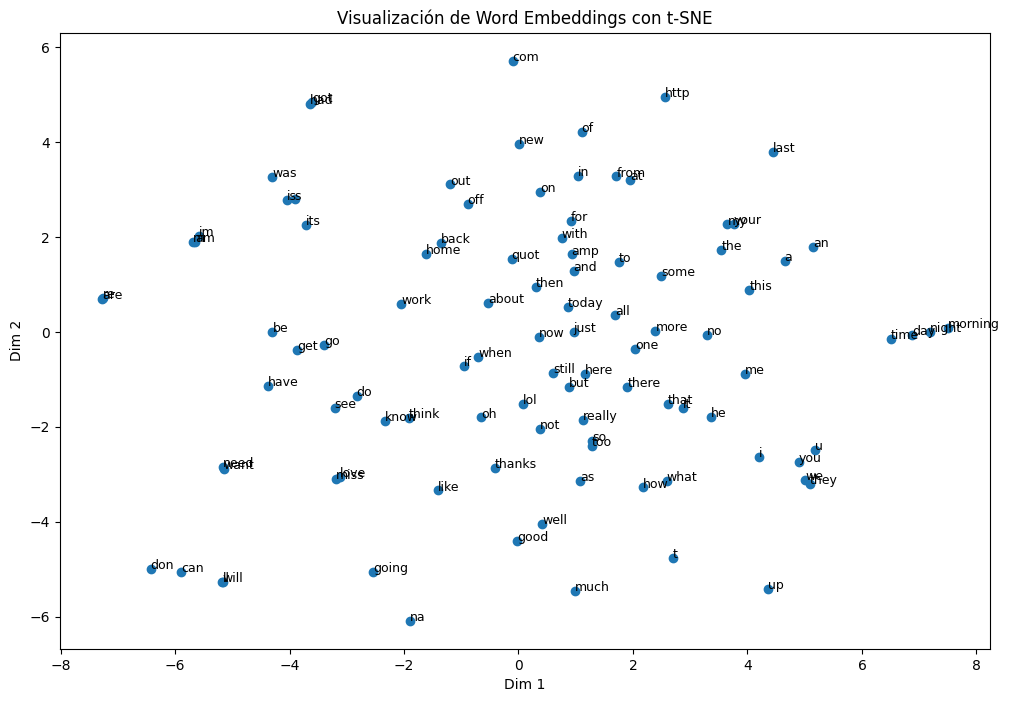

In [43]:
# Convertir la columna de texto en una lista de oraciones
corpus = df2_parte_2["text_limpio"].astype(str).tolist()

# Tokenización del corpus
tokenized_corpus = [word_tokenize(sentence.lower()) for sentence in corpus]

# Entrenar el modelo Word2Vec
model = Word2Vec(sentences=tokenized_corpus, vector_size=50, window=5, min_count=2, workers=4)  # min_count=2 para evitar palabras raras

# Búsqueda de analogías
try:
    analogia = model.wv.most_similar(positive=["hug", "hate"], negative=["cling"], topn=3)
    print("Analogías encontradas:", analogia)
except KeyError as e:
    print("Palabra no encontrada en el vocabulario:", e)

# Visualización de embeddings usando t-SNE para un subconjunto de palabras
words = list(model.wv.index_to_key)[:100]  # Solo 100 palabras para evitar sobrecarga
word_vectors = [model.wv[w] for w in words]

# Convertir a array de NumPy
word_vectors_array = np.array(word_vectors)

# Reducir la dimensionalidad con t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(word_vectors_array)

# Graficar embeddings
plt.figure(figsize=(12, 8))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1])
for i, word in enumerate(words):
    plt.annotate(word, (tsne_results[i, 0], tsne_results[i, 1]), fontsize=9)
plt.title("Visualización de Word Embeddings con t-SNE")
plt.xlabel("Dim 1")
plt.ylabel("Dim 2")
plt.show()

#### Ejercicio 4

In [ ]:
# Cargar los modelos de análisis de sentimiento
modelo_1 = pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment")
modelo_2 = pipeline("sentiment-analysis", model="cardiffnlp/twitter-xlm-roberta-base-sentiment")

# Obtener los textos desde df_es
textos = df2_parte_2["text_limpio"].astype(str).tolist()

# Evaluar los primeros 10 textos para evitar demoras excesivas
textos_muestra = textos[:10]

# Evaluar con modelo 1
resultados_modelo_1 = [modelo_1(texto)[0] for texto in textos_muestra]

# Evaluar con modelo 2
resultados_modelo_2 = [modelo_2(texto)[0] for texto in textos_muestra]

# Crear DataFrame para comparar resultados
df_resultados = pd.DataFrame({
    "Texto": textos_muestra,
    "Sentimiento_Modelo_1": [res["label"] for res in resultados_modelo_1],
    "Score_Modelo_1": [res["score"] for res in resultados_modelo_1],
    "Sentimiento_Modelo_2": [res["label"] for res in resultados_modelo_2],
    "Score_Modelo_2": [res["score"] for res in resultados_modelo_2],
})

# Mostrar la tabla con resultados
print(df_resultados)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/841 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.11G [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

                                               Texto Sentimiento_Modelo_1  \
0  Kenichan I dived many times for the ball Manag...               1 star   
1     my whole body feels itchy and like its on fire              2 stars   
2  nationwideclass no it s not behaving at all i ...               1 star   
3                        Kwesidei not the whole crew               1 star   
4                                         Need a hug              5 stars   
5  LOLTrish hey long time no see Yes Rains a bit ...              4 stars   
6                 Tatiana K nope they didn t have it               1 star   
7                              twittera que me muera               1 star   
8            spring break in plain city it s snowing              3 stars   
9                          I just re pierced my ears               1 star   

   Score_Modelo_1 Sentimiento_Modelo_2  Score_Modelo_2  
0        0.441793              neutral        0.439705  
1        0.407505             negative